<a href="https://colab.research.google.com/github/Rivenception/CSC521_Algorithms/blob/main/Research_Project/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data source
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_excel("/content/drive/My Drive/Dongshan stations.xlsx")
# df = pd.read_excel("Dongshan stations.xls")

# Strip whitespace from the column names (if any)
df.columns = df.columns.str.strip()

# # # Define the target variable (y) as the last column
# y = df.iloc[:, -5]  # Last column as y

# # # Define the features (X) as all columns except the last
# X = df.iloc[:, :-5]  # All columns except the last as X

# PM2.5 column only
X = df.drop(['PM2.5'],axis=1)
y = df[['PM2.5']]

# Display the names of the features and the target variable
print("Feature names (X):", X.columns.tolist())
print("Target variable name (y):", y.columns[0])
print("-------------------------------------")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the linear regression model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)

# Print coefficients and intercept
print("Estimated MLR Coefficients:", [f"{coef:.3f}" for coef in linear.coef_[0]])
print("Intercept:", f"{linear.intercept_[0]:.3f}")
print("-------------------------------------")

# Evaluate the model using R^2 score
r2_score = linear.score(X_test, y_test)
print("R^2 score on test set:", f"{r2_score:.3f}")
print("-------------------------------------")

# Make predictions on training and testing sets
y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

# Calculate and print Mean Squared Error for training and testing sets
# mse_train = mean_squared_error(y_train, y_train_pred)
# mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# print("Mean Squared Error on training set:", f"{mse_train:.3f}")
# print("Mean Squared Error on testing set:", f"{mse_test:.3f}")
# print("-------------------------------------")

print("Mean Absolute Error on training set:", f"{mae_train:.3f}")
print("Mean Absolute Error on testing set:", f"{mae_test:.3f}")
print("-------------------------------------")

Feature names (X): ['AMP_TMP', 'CO', 'NO', 'NO2', 'Nox', 'O3', 'PM10', 'RH', 'SO2', 'WD', 'WS']
Target variable name (y): PM2.5
-------------------------------------
Estimated MLR Coefficients: ['-0.141', '17.234', '0.006', '0.546', '-0.408', '0.188', '0.347', '-0.058', '0.522', '0.003', '-1.394']
Intercept: 2.662
-------------------------------------
R^2 score on test set: 0.814
-------------------------------------
Mean Absolute Error on training set: 3.536
Mean Absolute Error on testing set: 3.525
-------------------------------------


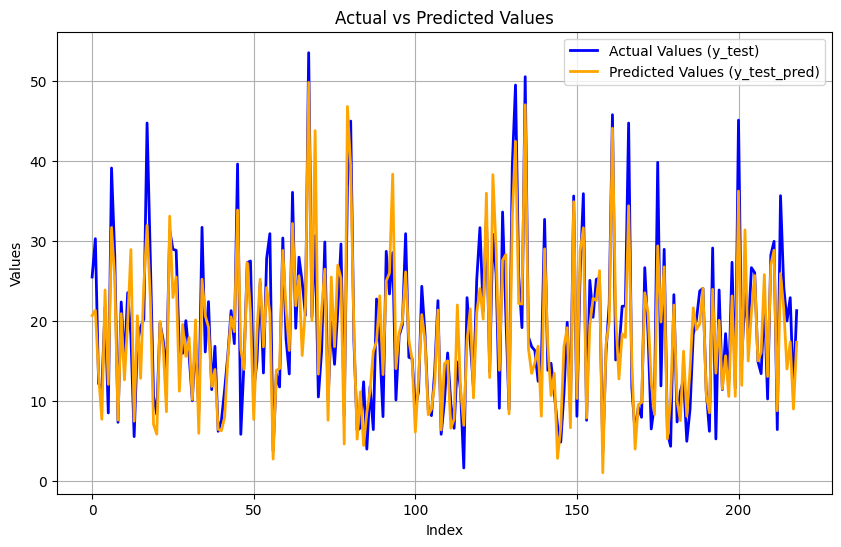

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Change y_test from Pandas DataFrame to Numpy
y_test_array = y_test.values
y_test_array = y_test.values.reshape(-1)  # Reshape to a 1D array
y_test_array = y_test.values.ravel() # Reshape to a 1D array

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot y_test and y_test_pred
plt.plot(y_test_array, label="Actual Values (y_test)", color='blue', linewidth=2)
plt.plot(y_test_pred, label="Predicted Values (y_test_pred)", color='orange', linewidth=2)

# Adding grid
plt.grid()

# Adding title and labels
plt.title("Actual vs Predicted Values")
plt.xlabel("Index")
plt.ylabel("Values")

# Adding a legend
plt.legend()

# Show the plot
plt.show()

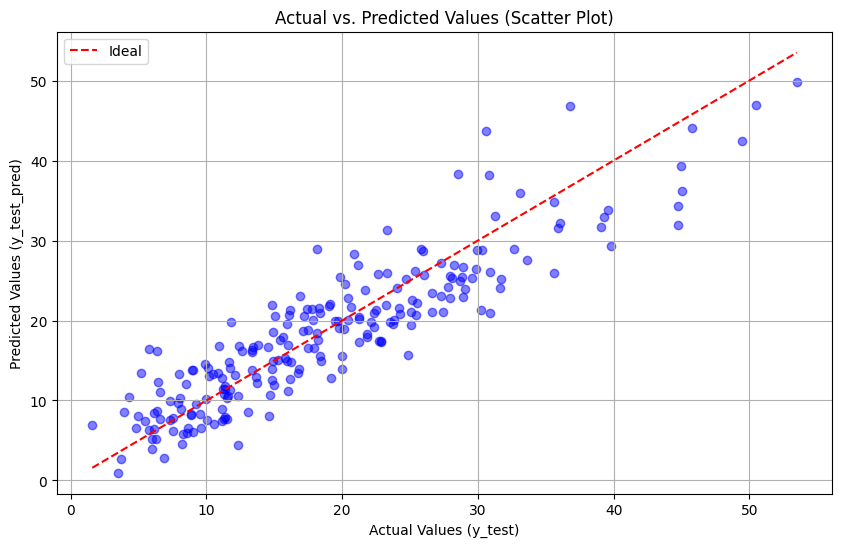

In [46]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)  # Alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal')  # Add a diagonal line for reference
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("Actual vs. Predicted Values (Scatter Plot)")
plt.legend()
plt.grid()

plt.show()

Linear Regression Analysis Notes:

If the regression line has a positive slope, the data has a positive linear relationship; if the regression line of the data has a negative slope, the data has a negative linear relationship. If the data is clustered tightly around its regression line, we might say it shows a strong linear relationship.

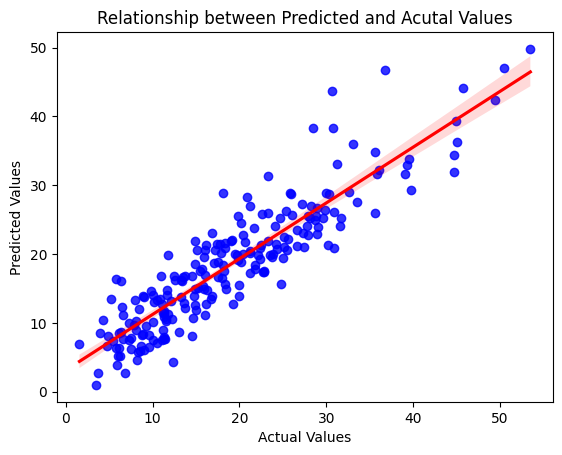

In [45]:
# testing seaborn over matplotlib to see the difference in output graphic
import seaborn as sns

sns.regplot(x=y_test, y=y_test_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Relationship between Predicted and Acutal Values")

plt.show()

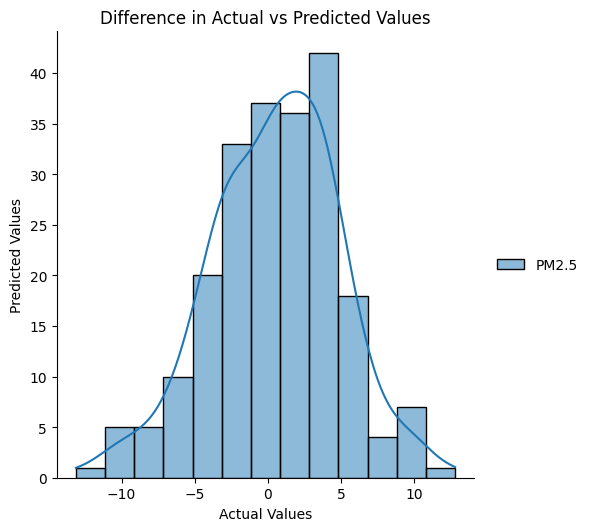

In [44]:
# Create a displot for the residuals
import seaborn as sns

residuals = y_test - y_test_pred
sns.displot(residuals, kde=True)  # Set kde=True to display the kernel density estimate
plt.title("Difference in Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()